In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from GRDECL2VTK import *

### Model Builder

In [2]:
Model=GeologyModel()
Model.fname='HomoCase'
Model.buildCartGrid(physDims=[600.0,10.0,75.0],gridDims=[60,1,60])

#Initial sw field for NPSL
Model.CreateCellData(varname="SW_NPSL",val=200)

#Setup initial permeability field
Model.UpdateCellData(varname="PERMX",val=200)
Model.UpdateCellData(varname="PERMY",val=200)
Model.UpdateCellData(varname="PERMZ",val=10)

Model.UpdateCellData(varname="PERMX",val=500,nz_range=(1,20))
Model.UpdateCellData(varname="PERMX",val=10,nz_range=(21,40))
Model.UpdateCellData(varname="PERMX",val=200,nz_range=(41,60))

#Write to file for visulizatoin
Model.GRDECL2VTK()
Model.Write2VTU()
Model.WriteNPSL()

     Grid Type=Cartesian Grid
     Grid Dimension(NX,NY,NZ): (60 x 1 x 60)
     NumOfGrids=3600
     New variable [SW_NPSL] created with a value of 200.000000!
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 28800
     NumOfCells 3600
     .....Done!
[Output] Writing "Results\HomoCase.vtu" Paraview file....Done!
NPSL file [Results\HomoCase_permx.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HomoCase_permy.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HomoCase_permz.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HomoCase_poro.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HomoCase_sw.txt] successfully genetrated, pelase use NPSL to load it!


### Create a initial water saturation field

In [3]:
#Setup initial water saturaion field
Model.UpdateCellData(varname="SW_NPSL",val=1,nz_range=(1,20))
Model.UpdateCellData(varname="SW_NPSL",val=0,nz_range=(21,40))
Model.UpdateCellData(varname="SW_NPSL",val=1,nz_range=(41,60))

#Write to file for visulization
Model.GRDECL2VTK()
Model.Write2VTU()
Model.WriteNPSL()

[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 28800
     NumOfCells 3600
     .....Done!
[Output] Writing "Results\HomoCase.vtu" Paraview file....Done!
NPSL file [Results\HomoCase_permx.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HomoCase_permy.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HomoCase_permz.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HomoCase_poro.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HomoCase_sw.txt] successfully genetrated, pelase use NPSL to load it!


In [4]:
#Update any region by given nx_range,ny_range and nz_range
#Model.UpdateCellData(varname="PERMX",val=150,nx_range=(1,60),nz_range=(1,5))
#Model.UpdateCellData(varname="PERMX",val=100,nx_range=(1,30),nz_range=(6,10))
#Model.UpdateCellData(varname="PERMX",val=10,nx_range=(1,40),nz_range=(11,15))

### Model Builder 2, Random Field

In [12]:
Model=GeologyModel()
Model.fname='HeterCase'

physDims=[600.0,600.0,75.0]
gridDims=[50,50,4]
Model.buildCartGrid(physDims,gridDims)

#Initial sw field for NPSL
Model.CreateCellData(varname="SW_NPSL",val=1)

     Grid Type=Cartesian Grid
     Grid Dimension(NX,NY,NZ): (50 x 50 x 4)
     NumOfGrids=10000
     New variable [SW_NPSL] created with a value of 1.000000!


Layer1 Perm Avg=1000.000000 min=608.692371 max=1661.085839
Layer2 Perm Avg=500.000000 min=310.440448 max=722.481220
Layer3 Perm Avg=100.000000 min=62.530422 max=176.216839
Layer4 Perm Avg=300.000000 min=169.529826 max=550.721542


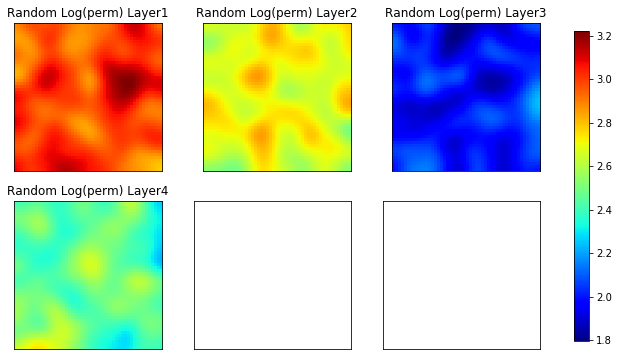

Layer1 Poro Avg=0.344521 min=0.320566 max=0.370761
Layer2 Poro Avg=0.310190 min=0.286900 max=0.329135
Layer3 Poro Avg=0.229475 min=0.206783 max=0.258586
Layer4 Poro Avg=0.284268 min=0.256651 max=0.315561


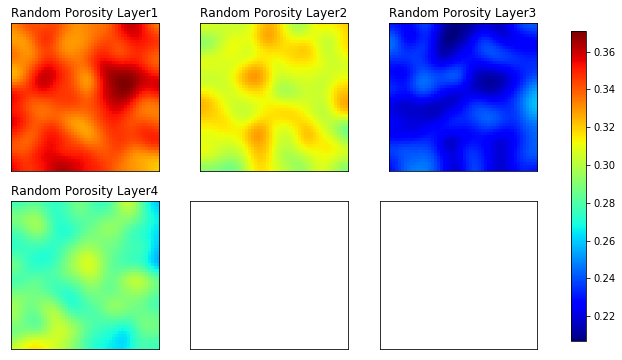

In [13]:
from utils import logNormLayers
#Create random perm field with normal distribution for each layer
K,phi=logNormLayers(gridDims,AvgLayerPerm=[1000,500,100,300],poro_const=0.05)

In [14]:
#Setup initial permeability field
Model.UpdateCellData(varname="PERMX",array=K)
Model.UpdateCellData(varname="PERMY",array=K)
Model.UpdateCellData(varname="PERMZ",array=0.1*K)

Model.UpdateCellData(varname="PORO",array=phi)

#Write to file for visulization
Model.GRDECL2VTK()
Model.Write2VTU()
Model.WriteNPSL()

[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 80000
     NumOfCells 10000
     .....Done!
[Output] Writing "Results\HeterCase.vtu" Paraview file....Done!
NPSL file [Results\HeterCase_permx.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HeterCase_permy.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HeterCase_permz.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HeterCase_poro.txt] successfully genetrated, pelase use NPSL to load it!
NPSL file [Results\HeterCase_sw.txt] successfully genetrated, pelase use NPSL to load it!
